### Simple 4 × 4 grid world (programming)

Implement a 4×4 grid world with two terminal states in the upper left
corner and lower right corners (resulting in 14 non-terminal states).
The four actions 𝒜 = {up, down, left,right} act deterministically, the
discount factor is 𝛾 = 1, and the reward is always equal to −1. Ensure
that a maximum number of time steps can be specified.


In [121]:
import numpy as np
from matplotlib import pyplot as plt

In [122]:
def softmax(x, axis=0):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=axis)

In [123]:
class Grid:
    
    def __init__(self, w, h):
        self._w = w
        self._h = h
        
        self.R = -np.ones((w, h))
        self.actions = {
            "up": 0,
            "down": 1,
            "left": 2,
            "right": 3
        }
        
        self.terminal = [(0,0), (w-1, h-1)]
                    
    def sprime(self, s:np.array, a:int) -> tuple:
        # actions: (0,1,2,3) = (up, down, left, right)
        actions = {
            0: np.array((-1, 0)),
            1: np.array((1, 0)),
            2: np.array((0, -1)),
            3: np.array((0, 1))
        }
        s_prime = s + actions[a]
        s_prime[0] = max(min(s_prime[0], self._w-1), 0)
        s_prime[1] = max(min(s_prime[1], self._h-1), 0)
        
        return tuple(s_prime)

    def reward(self, s:np.array, a: int) -> float:
        s_prime = self.sprime(s, a)
        reward = self.R[s_prime[0], s_prime[1]]

        return reward

    def cumulative_reward(self, s, π, γ=0.9, max_steps=1):
        reward = 0
        
        for a in range(π.shape[0]):
            sprime = self.sprime(s, a)
            
            if max_steps > 1:
                reward += π[a, s[0], s[1]]*(self.reward(s, a) + γ*self.cumulative_reward(sprime, π, γ, max_steps-1))
            else:
                reward += π[a, s[0], s[1]]*self.reward(s, a)
        return reward

In [124]:
w, h = 4, 4

g = Grid(w, h)

In [125]:
# A policy function is a matrix "policy" with shape (#actions, grid_w, grid_h) 
# where policy[a, x, y] is the probability of adction a in state (x, y).
# actions: (1,2,3,4) = (up, down, left, right)

# π = softmax(np.random.rand(4, w, h)); # random policy
π = softmax(np.ones((4, w, h))); # equiprob policy

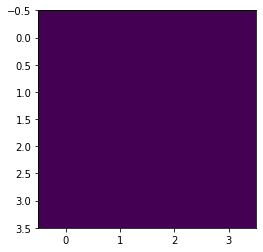

In [126]:
plt.imshow(g.R)